# Random Forest Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
# df = pd.read_csv('UTAMA-NO-IMPUTATION-AGUST-SEPT-OKT.csv', encoding='unicode_escape')
df = pd.read_csv('UTAMA-IMPUTATION-AGUST-SEPT-OKT.csv', encoding='unicode_escape')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# df_BULAN = pd.read_csv('UTAMA-NO-IMPUTATION-NOV.csv', encoding='unicode_escape')
# df_BULAN = pd.read_csv('UTAMA-NO-IMPUTATION-DELETION-NOV.csv', encoding='unicode_escape')
df_BULAN = pd.read_csv('UTAMA-IMPUTATION-NOV.csv', encoding='unicode_escape')

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Imputasi

## Training the Random Forest Regression model on the whole dataset

In [ ]:
criterions = ["squared_error", "friedman_mse", "absolute_error"]
maxDepths = [i for i in range(1,20+1)]
nEstimators = [i for i in range(1,50+1)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
bestR2 = 0

print("criterion,max_depth,n_estimators")

for criterionFunction in criterions:
  for maxDepth in maxDepths:
    for nEstimator in nEstimators:
      regressor = RandomForestRegressor(criterion = criterionFunction, max_depth=maxDepth, n_estimators = nEstimator)
      regressor.fit(X_train, y_train)
      y_pred = regressor.predict(X_test)
      nowR2 = r2_score(y_test, y_pred)

      print()
      if nowR2 > bestR2:
        bestR2 = nowR2
        bestCriterion = criterionFunction
        bestMaxDepth = maxDepth
        bestN = nEstimator

print("------------------------")
print(bestR2)
print(bestCriterion)
print(bestMaxDepth)
print(bestN)



0.940634665339044
absolute_error
5
6


## Predicting the Test set results

In [ ]:
regressor = RandomForestRegressor(criterion = "absolute_error", max_depth=5, n_estimators = 6)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# r2_score(y_test, y_pred)

0.9417423032823768

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R2 = ", r2_score(y_test, y_pred))
print("RMSE = ", mean_squared_error(y_test, y_pred, squared=False) )
print("MSE = ", mean_squared_error(y_test, y_pred) )
print("MAE = ", mean_absolute_error(y_test, y_pred) )

R2 =  0.9417423032823768
RMSE =  1.8467438601304762
MSE =  3.410462884929612
MAE =  0.7498661387631973


## Grafik

In [ ]:
data_x = list(range(1,len(y_test)+1))
import matplotlib.pyplot as plt
# jumlah_data_grafik = 150
# plt.figure(figsize=(12, 3))

jumlah_data_grafik = len(y_test)
plt.figure(figsize=(12, 3))

plt.axis((0,len(y_test), 0,100))
plt.xlabel("Data test ke-n")
plt.ylabel("Kadar air tanah (%)")

plt.plot(data_x[:jumlah_data_grafik], y_test[:jumlah_data_grafik])
plt.scatter(data_x[:jumlah_data_grafik], y_pred[:jumlah_data_grafik], color='red')

# plt.show()


In [ ]:
print(len(y_test))

442


In [ ]:
X_BULAN_test = df_BULAN.iloc[:, :-1].values
y_BULAN_test = df_BULAN.iloc[:, -1].values

# print(X_BULAN_test)
# print(y_BULAN_test)

In [ ]:
y_BULAN_pred = regressor.predict(X_BULAN_test)

print("R2 = ", r2_score(y_BULAN_test, y_BULAN_pred))
print("RMSE = ", mean_squared_error(y_BULAN_test, y_BULAN_pred, squared=False) )
print("MSE = ", mean_squared_error(y_BULAN_test, y_BULAN_pred) )
print("MAE = ", mean_absolute_error(y_BULAN_test, y_BULAN_pred) )

R2 =  0.9517465327545425
RMSE =  2.1498853631421317
MSE =  4.6220070746527755
MAE =  0.9362349537037034


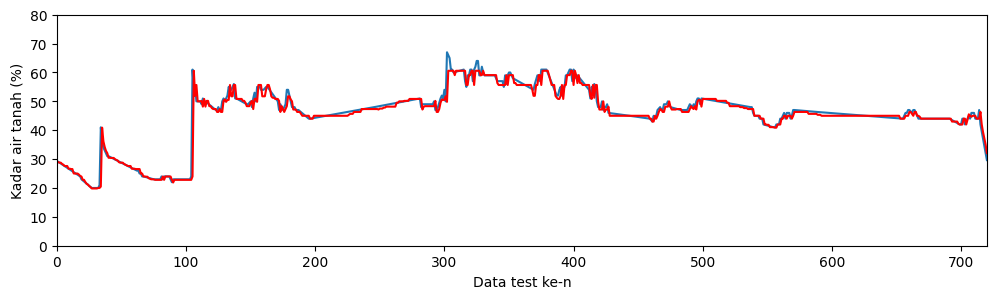

In [ ]:
data_x = list(range(1,len(y_BULAN_test)+1))
import matplotlib.pyplot as plt
jumlah_data_grafik = len(y_BULAN_test)
# plt.figure(figsize=(12, 3))
plt.figure(figsize=(12, 3))

plt.axis((0,len(y_BULAN_test), 0,80))
plt.xlabel("Data test ke-n")
plt.ylabel("Kadar air tanah (%)")

plt.plot(data_x[:jumlah_data_grafik], y_BULAN_test[:jumlah_data_grafik])
plt.plot(data_x[:jumlah_data_grafik], y_BULAN_pred[:jumlah_data_grafik], color='red')

# plt.scatter(y_pred, y_test)

plt.show()